In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
polls = pd.read_csv("villagers_polls.csv",index_col=0)

In [3]:
polls.head()

,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21
Name,,,,,,,,,,,,,,,,,
Admiral,84,104,66,29,29,24,34,22,29,37,25,23,16,9,10,7,11
Agent S,226,235,96,65,65,41,36,44,36,50,36,27,13,21,16,14,22
Agnes,376,400,228,146,146,95,85,96,116,120,92,70,49,45,38,29,64
Al,110,123,46,31,31,20,15,15,20,23,18,6,15,10,12,7,15
Alfonso,241,214,108,53,53,29,26,40,55,80,50,45,28,12,13,9,25


In [4]:
traits0 = pd.read_csv("villagers_traits.csv",index_col=0)

In [5]:
traits0.head()

,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
Name,,,,,,,,,,,,,,,,
Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [6]:
#total poll numbers for each villager

pollsum=polls.sum(axis='columns')
pollsum.rename("PollSum")

Name
Admiral       559
Agent S      1043
Agnes        2195
Al            517
Alfonso      1081
            ...  
Winnie        338
Wolfgang     2357
Yuka          416
Zell         2493
Zucker      15247
Name: PollSum, Length: 391, dtype: int64

In [7]:
pollsum.head(10)

Name
Admiral      559
Agent S     1043
Agnes       2195
Al           517
Alfonso     1081
Alice       1162
Alli         205
Amelia       606
Anabelle     872
Anchovy      594
dtype: int64

In [81]:
pollsum.sort_values(ascending=False).head(12)

Name
Marshal     25481
Raymond     23901
Sherb       16983
Zucker      15247
Judy        12687
Marina      11537
Stitches    10674
Ankha       10584
Audie       10485
Fauna       10042
Beau         9775
Dom          9661
dtype: int64

In [9]:
top10=pollsum.sort_values(ascending=False).head(10)
top10

Name
Marshal     25481
Raymond     23901
Sherb       16983
Zucker      15247
Judy        12687
Marina      11537
Stitches    10674
Ankha       10584
Audie       10485
Fauna       10042
dtype: int64

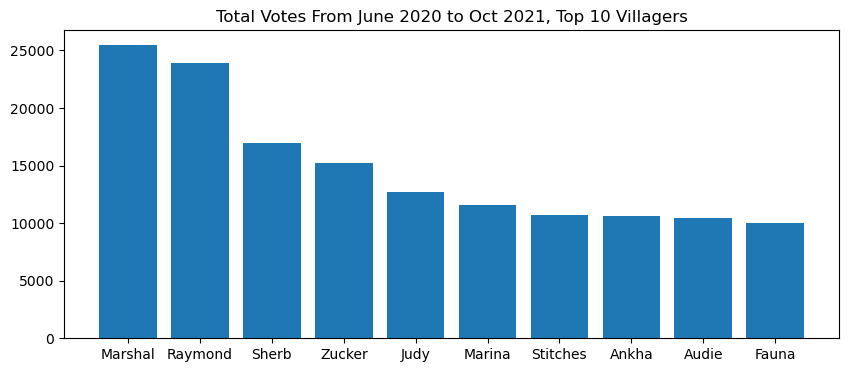

In [10]:
plt.figure(figsize=(10,4))

plt.bar(x=top10.index,height=top10)

plt.title("Total Votes From June 2020 to Oct 2021, Top 10 Villagers")

plt.show()

In [11]:
type(top10)

pandas.core.series.Series

In [12]:
top10.index

Index(['Marshal', 'Raymond', 'Sherb', 'Zucker', 'Judy', 'Marina', 'Stitches',
       'Ankha', 'Audie', 'Fauna'],
      dtype='object', name='Name')

In [13]:
bot10=pollsum.sort_values().head(10)
bot10

Name
Violet      134
Snooty      137
Bitty       139
Limberg     141
Harry       145
Pancetti    147
Rizzo       147
Boyd        149
Moose       150
Greta       154
dtype: int64

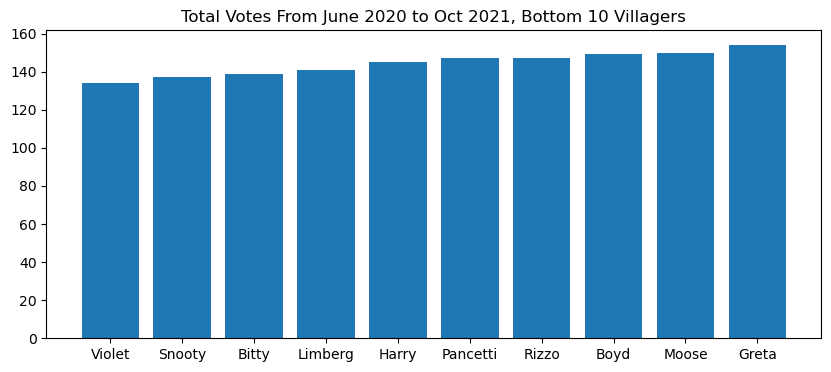

In [14]:
plt.figure(figsize=(10,4))

plt.bar(x=bot10.index,height=bot10)

plt.title("Total Votes From June 2020 to Oct 2021, Bottom 10 Villagers")

plt.show()

In [76]:
series5=pollsum.loc[['Sherb','Megan','Dom','Audie','Cyd','Judy','Raymond','Reneigh']].sort_values(ascending=False)

series5

Name
Raymond    23901
Sherb      16983
Judy       12687
Audie      10485
Dom         9661
Reneigh     1842
Megan        946
Cyd          719
dtype: int64

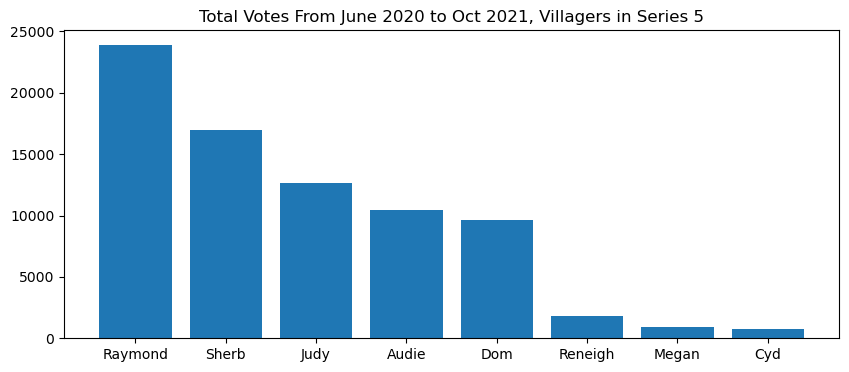

In [77]:
plt.figure(figsize=(10,4))

plt.bar(x=series5.index,height=series5)

plt.title("Total Votes From June 2020 to Oct 2021, Villagers in Series 5")

plt.show()

In [51]:
#combine dataframe with pollsum and villager traits.

traits=traits0.loc[:,['Species','Personality','Gender','Style 1','Color 1','Hobby']]

traits

,Species,Personality,Gender,Style 1,Color 1,Hobby
Name,,,,,,
Admiral,Bird,Cranky,Male,Cool,Black,Nature
Agent S,Squirrel,Peppy,Female,Active,Blue,Fitness
Agnes,Pig,Big Sister,Female,Simple,Pink,Play
Al,Gorilla,Lazy,Male,Active,Red,Fitness
Alfonso,Alligator,Lazy,Male,Simple,Red,Play
...,...,...,...,...,...,...
Winnie,Horse,Peppy,Female,Cool,White,Fashion
Wolfgang,Wolf,Cranky,Male,Cool,Black,Education
Yuka,Koala,Snooty,Female,Cool,Orange,Fashion


In [53]:
polltrait=pd.concat([traits,pollsum],axis=1)
polltrait.rename(columns={0:'PollSum'},inplace=True)
polltrait

,Species,Personality,Gender,Style 1,Color 1,Hobby,PollSum
Name,,,,,,,
Admiral,Bird,Cranky,Male,Cool,Black,Nature,559
Agent S,Squirrel,Peppy,Female,Active,Blue,Fitness,1043
Agnes,Pig,Big Sister,Female,Simple,Pink,Play,2195
Al,Gorilla,Lazy,Male,Active,Red,Fitness,517
Alfonso,Alligator,Lazy,Male,Simple,Red,Play,1081
...,...,...,...,...,...,...,...
Winnie,Horse,Peppy,Female,Cool,White,Fashion,338
Wolfgang,Wolf,Cranky,Male,Cool,Black,Education,2357
Yuka,Koala,Snooty,Female,Cool,Orange,Fashion,416


In [17]:
polltrait.groupby('Personality').PollSum.mean().sort_values(ascending=False)

Personality
Smug          2353.764706
Normal        2173.220339
Lazy          2068.650000
Peppy         1715.428571
Big Sister    1239.833333
Snooty        1009.109091
Jock           996.272727
Cranky         739.909091
Name: PollSum, dtype: float64

In [26]:
polltrait.groupby('Personality').PollSum.std().sort_values(ascending=False)
#smug must be huge because of the biggest and smallest numbers

Personality
Smug          5775.738626
Lazy          3597.519413
Normal        2781.536322
Snooty        2336.664738
Peppy         2188.223880
Jock          1731.178056
Big Sister    1084.930119
Cranky         989.541856
Name: PollSum, dtype: float64

In [27]:
polltrait.groupby('Personality').PollSum.median().sort_values(ascending=False)

Personality
Normal        944.0
Big Sister    905.5
Peppy         872.0
Lazy          654.5
Smug          567.5
Jock          454.0
Cranky        398.0
Snooty        285.0
Name: PollSum, dtype: float64

In [33]:
polltrait.groupby('Personality').PollSum.min().sort_values(ascending=False)

Personality
Big Sister    179
Normal        176
Smug          172
Peppy         170
Lazy          168
Jock          150
Cranky        141
Snooty        134
Name: PollSum, dtype: int64

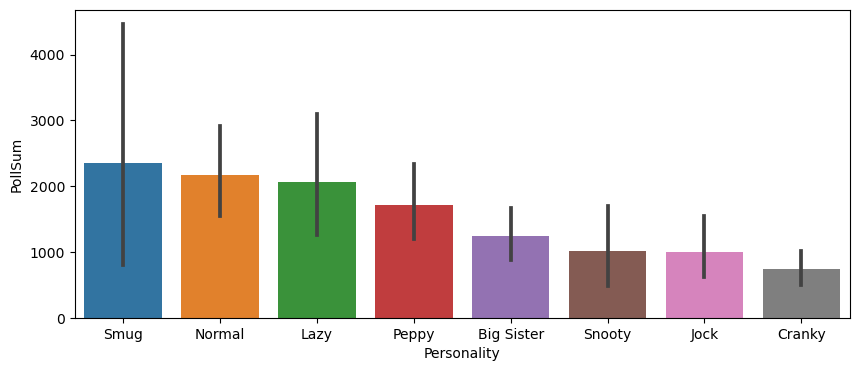

In [34]:
plt.figure(figsize=(10,4))

sns.barplot(data=polltrait,x='Personality',y='PollSum',
            order=polltrait.groupby('Personality').PollSum.mean().sort_values(ascending=False).index)

plt.show()

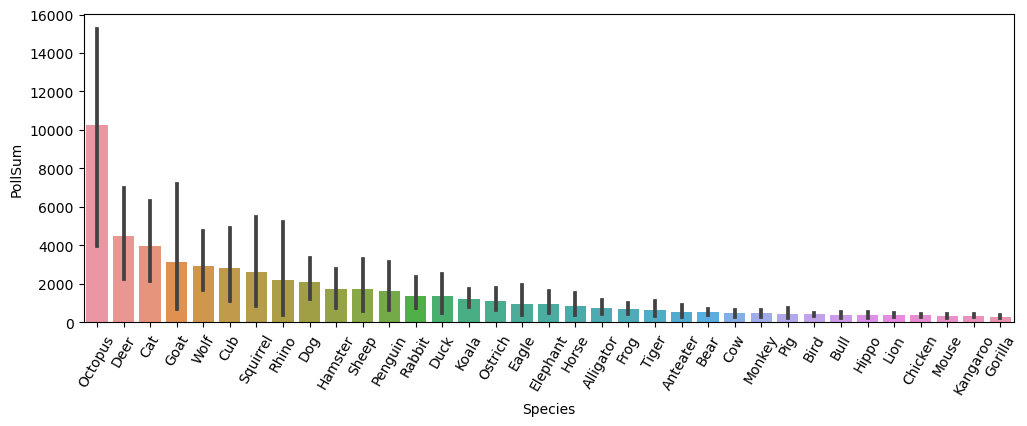

In [48]:
plt.figure(figsize=(12,4))

sns.barplot(data=polltrait,x='Species',y='PollSum',
           order=polltrait.groupby('Species').PollSum.mean().sort_values(ascending=False).index)

plt.xticks(rotation=60)

plt.show()

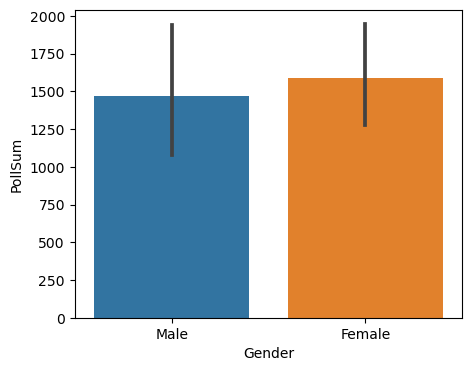

In [55]:
plt.figure(figsize=(5,4))

sns.barplot(data=polltrait,x='Gender',y='PollSum')

plt.show()

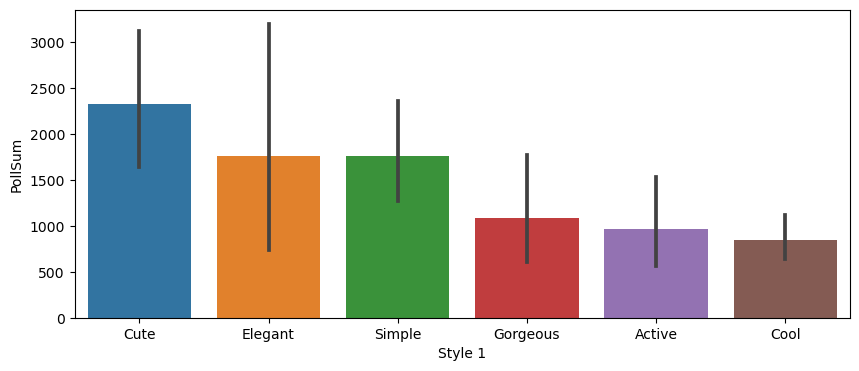

In [63]:
plt.figure(figsize=(10,4))

sns.barplot(data=polltrait,x='Style 1',y='PollSum',
            order=polltrait.groupby('Style 1').PollSum.mean().sort_values(ascending=False).index)

plt.show()

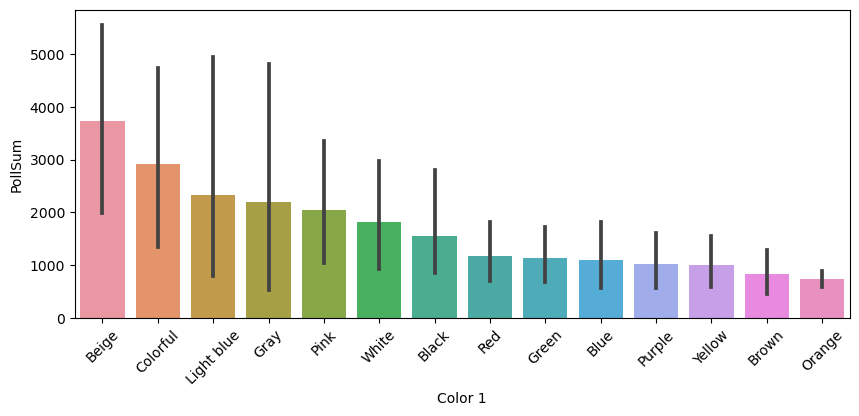

In [59]:
plt.figure(figsize=(10,4))

sns.barplot(data=polltrait,x='Color 1',y='PollSum',
            order=polltrait.groupby('Color 1').PollSum.mean().sort_values(ascending=False).index)

plt.xticks(rotation=45)

plt.show()

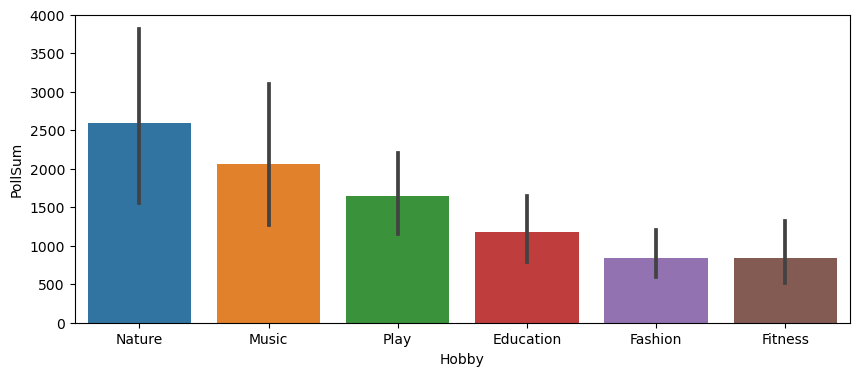

In [61]:
plt.figure(figsize=(10,4))

sns.barplot(data=polltrait,x='Hobby',y='PollSum',
            order=polltrait.groupby('Hobby').PollSum.mean().sort_values(ascending=False).index)

plt.show()

In [49]:
polltrait.loc[polltrait.Species=="Octopus"].sort_values(by="PollSum")

,Species,Personality,PollSum
Name,,,
Octavian,Octopus,Cranky,3952
Marina,Octopus,Normal,11537
Zucker,Octopus,Lazy,15247


In [45]:
polltrait.loc[polltrait.Species=="Deer"].sort_values(by="PollSum")

,Species,Personality,PollSum
Name,,,
Bruce,Deer,Cranky,893
Lopez,Deer,Smug,1151
Deirdre,Deer,Big Sister,1401
Fuchsia,Deer,Big Sister,1483
Bam,Deer,Jock,2295
Zell,Deer,Smug,2493
Diana,Deer,Snooty,7012
Erik,Deer,Lazy,8355
Beau,Deer,Lazy,9775


In [46]:
polltrait.loc[polltrait.Species=="Cat"].sort_values(by="PollSum")

,Species,Personality,PollSum
Name,,,
Kitty,Cat,Snooty,285
Monique,Cat,Snooty,286
Tom,Cat,Cranky,539
Stinky,Cat,Jock,549
Moe,Cat,Lazy,644
Purrl,Cat,Snooty,716
Tabby,Cat,Peppy,912
Felicity,Cat,Peppy,1012
Olivia,Cat,Snooty,1178


In [47]:
polltrait.loc[polltrait.Personality=="Smug"].sort_values(by="PollSum")

,Species,Personality,PollSum
Name,,,
Chops,Pig,Smug,172
Lucha,Bird,Smug,264
Ed,Horse,Smug,278
Huck,Frog,Smug,280
Hippeux,Hippo,Smug,318
Leopold,Lion,Smug,345
Curlos,Sheep,Smug,350
Hans,Gorilla,Smug,361
Olaf,Anteater,Smug,370
